In [1]:
import astropy.units as u
from astropy import constants as const
import matplotlib.pyplot as plt

import MulensModel as mm
from MulensModel.mulensobjects.lens import Lens
from MulensModel.mulensobjects.source import Source
from MulensModel.mulensobjects.mulenssystem import MulensSystem
from MulensModel.modelparameters import which_parameters

# Sun only Lens

In [2]:
# DEFINE SUN AND ARBITRARY SOURCE WITH DIST AND MASS

# Define a Lens star
sun = Lens(mass=1*u.solMass, distance=6.*u.kpc)
#mercury = Lens(mass=1.651e-7*u.solMass, distance=6.*u.kpc)

# Define a Source Star
my_source = Source(distance=8*u.kpc)

# Combine them into a lens system
sun_source = MulensSystem(lens=sun, source=my_source, mu_rel = 4. * u.mas / u.yr)

print(sun_source)


------
Lens Distance: 6.0 kpc
Lens Total Mass: 1.0 solMass
Source Distance: 8.0 kpc
theta_E = 0.5825179996049609 mas
mu_rel = 4.0 mas / yr
t_E = 53.19117483892799 d
------


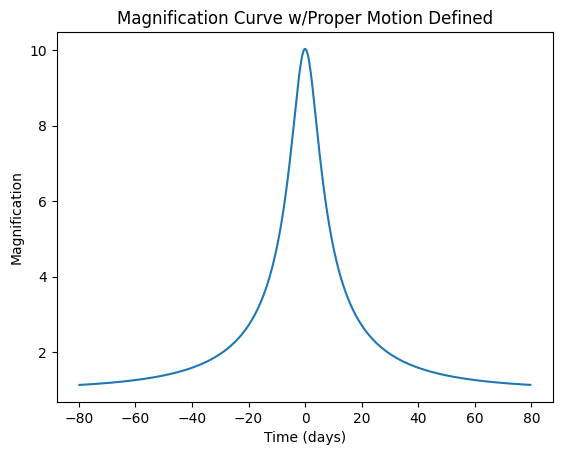

In [3]:
plt.figure()
sun_source.plot_magnification(u_0=0.1)
plt.title('Magnification Curve w/Proper Motion Defined')

plt.show()

# Earth-Sun Lens

In [4]:
q_es = float(const.M_earth/const.M_sun)
s_es = float(1*u.AU/sun_source.r_E)
mass_es = const.M_earth+const.M_sun

earth_sun = Lens(s = s_es, epsilon=[const.M_earth/mass_es,const.M_sun/mass_es],total_mass=mass_es,distance = 6.*u.kpc)

# Define a Source Star
my_source = Source(distance=8*u.kpc)

# Combine them into a lens system
earth_syst = MulensSystem(lens=earth_sun, source=my_source, mu_rel = 20. * u.mas / u.yr)
earth_syst

------
Lens Distance: 6.0 kpc
Lens Total Mass: 1.9884158428659188e+30 kg
Source Distance: 8.0 kpc
theta_E = 0.5825188743976076 mas
mu_rel = 20.0 mas / yr
t_E = 10.638250943686309 d
------

In [5]:
t_0 = 0.
u_0 = 0.3
t_E = earth_syst.t_E.value


pspl = mm.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E})

In [6]:
s = 1*u.AU/sun_source.r_E
q = const.M_earth/const.M_sun
alpha = 60.

earth = mm.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E, 's': s, 'q': q, 'alpha': alpha})

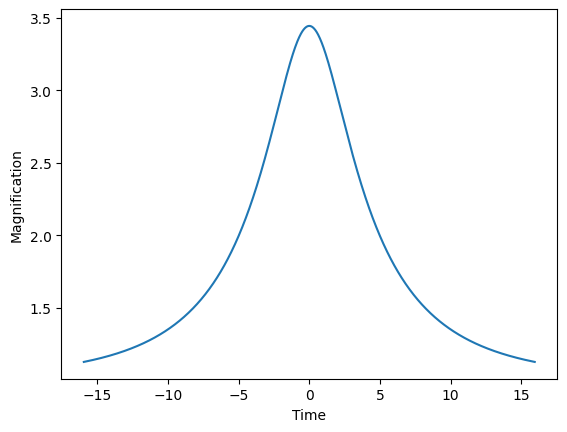

In [7]:
earth.plot_magnification()

# Jupiter-Sun Lens

In [8]:
const.M_jup.value

1.8981245973360505e+27

In [9]:
q_js = float(const.M_jup/const.M_sun)
s_js = float(5.2*u.AU/sun_source.r_E)
mass_js = const.M_jup+const.M_sun

jup_sun = Lens(s = s_js, epsilon=[const.M_jup/mass_js,const.M_sun/mass_js],total_mass=mass_js,distance =6.*u.kpc)

# Define a Source Star
my_source = Source(distance=8*u.kpc)

# Combine them into a lens system
jup_syst = MulensSystem(lens=jup_sun, source=my_source, mu_rel = 20. * u.mas / u.yr)
jup_syst

------
Lens Distance: 6.0 kpc
Lens Total Mass: 1.990307995295387e+30 kg
Source Distance: 8.0 kpc
theta_E = 0.582795967445963 mas
mu_rel = 20.0 mas / yr
t_E = 10.643311355481899 d
------

In [10]:
t_0 = 0.
u_0 = 0.3
t_E = jup_syst.t_E

pspl = mm.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E})

In [11]:
s = 5.2*u.AU/sun_source.r_E
q = const.M_jup/const.M_sun
alpha = 335.

planet = mm.Model({'t_0': t_0, 'u_0': u_0, 't_E': t_E, 's': s, 'q': q, 'alpha': alpha})

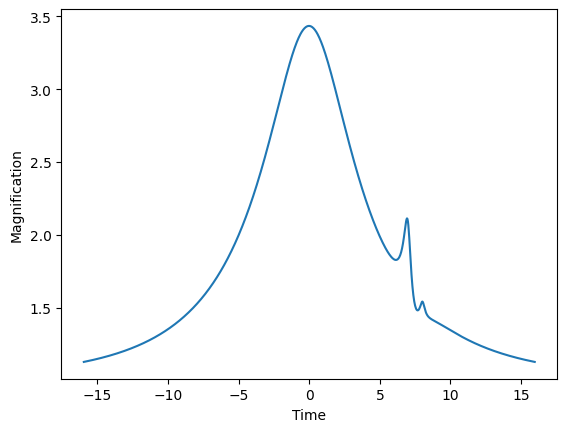

In [12]:
planet.plot_magnification()

In [13]:
t_E.value/2

5.321655677740949

In [17]:
type(s)

astropy.units.quantity.Quantity

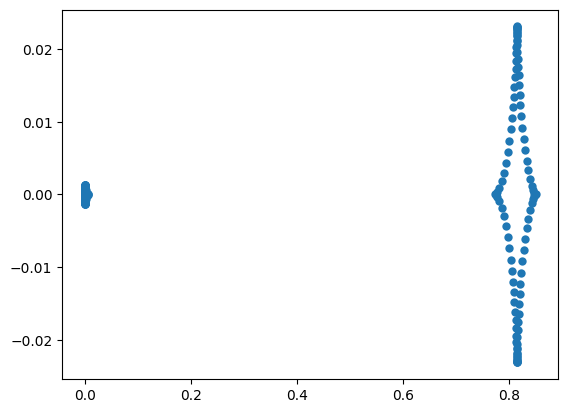

In [19]:
caustic = mm.Caustics(s=float(s), q=float(q))
caustic.plot(n_points=200)

TypeError: 'Quantity' object with a scalar value has no len()

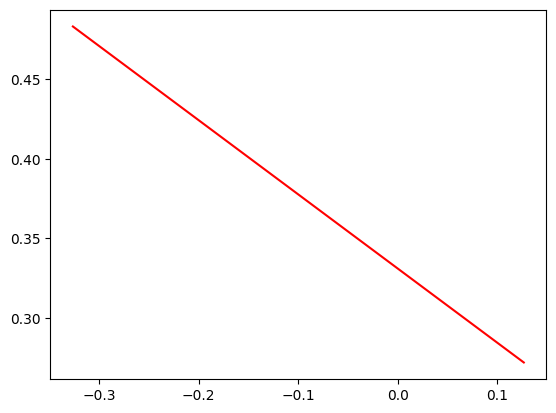

In [136]:
# F5: Plot source trajectory and caustic
planet.plot_trajectory(t_range=[t_0 - t_E.value / 2., t_0], color='red', caustics=True, arrow=False) # plotting caustics is built into trajectory function
planet.plot_trajectory(t_range=[t_0, t_0 + t_E.value], linestyle=':', color='blue')
plt.axis('equal')
plt.title('Source Trajectory')

plt.show()

# OTHER

In [56]:
# q = M_pl/ M_primary_lens
# s =

q_es = float(const.M_earth/const.M_sun)
s_es = float(1*u.AU/sun_source.r_E)
mass_es = const.M_earth+const.M_sun
#q = q_es, , , distance =6.*u.kpc,
earth_sun = Lens(s = s_es, epsilon=[const.M_earth/mass_es,const.M_sun/mass_es],total_mass=mass_es,distance =6.*u.kpc)

# Define a Source Star
my_source = Source(distance=8*u.kpc)

# Combine them into a lens system
earth_syst = MulensSystem(lens=earth_sun, source=my_source, mu_rel = 4. * u.mas / u.yr)
earth_syst

------
Lens Distance: 6.0 kpc
Lens Total Mass: 1.9884158428659188e+30 kg
Source Distance: 8.0 kpc
theta_E = 0.5825188743976076 mas
mu_rel = 4.0 mas / yr
t_E = 53.191254718431544 d
------

In [25]:
q_es = float(const.M_earth/const.M_sun)
s_es = float(1*u.AU/sun_source.r_E)
binary_model = mm.Model(parameters={'t_0': 0, 'u_0': 1, 't_E': 53.191254718431544, 's': s_es, 'q': q_es, 'alpha': 15.})#,'n_lenses':2})
#  'u_0' : None, 't_E': None ,'t_0': None
print(binary_model)

    t_0 (HJD)       u_0    t_E (d)         s            q alpha (deg) 
      0.00000  0.100000    53.1913   0.28611   0.00000300    15.00000 



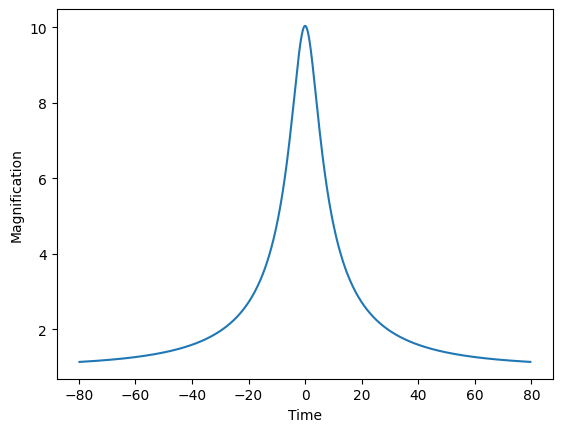

In [26]:
binary_model.plot_magnification()

In [57]:
plt.figure()
earth_syst.plot_magnification(u_0=0.1, alpha=15.)
plt.title('Magnification Curve w/Proper Motion Defined')

plt.show()

AttributeError: 'Lens' object has no attribute '_s'

<Figure size 640x480 with 0 Axes>

# Mercury-Sun Lens

In [ ]:
#mercury = Lens(mass=1.651e-7*u.solMass, distance=6.*u.kpc)

In [8]:
mercury_source.r_E

<Quantity 0.00142015 AU>

In [7]:
# Definining quantities
source_obj = mercury_source
r_E = source_obj.theta_E * 

<Quantity 0.00023669 mas>

In [ ]:
# q= M_pl/ M_primary_lens
# 
sun_mercury = Lens(q=, s=)
# Define a Source Star
my_source = Source(distance=8*u.kpc)

# Combine them into a lens system
merc_syst = MulensSystem(lens=sun_mercury, source=my_source, mu_rel = 4. * u.mas / u.yr)
print(merc_syst)

In [13]:
plt.figure()
merc_syst.plot_magnification(u_0=0.1, alpha = 15.)
plt.title('Magnification Curve w/Proper Motion Defined')

plt.show()

AttributeError: 'Lens' object has no attribute '_s'

<Figure size 640x480 with 0 Axes>

In [6]:
### THIS NOTATION NOT YET IMPLEMENTED - DO NOT USE###
# sun_mercury = Lens(mass_1=1*u.solMass, mass_2=1.651e-7*u.solMass, a_proj=0.4, distance=6.*u.kpc)
# # Define a Source Star
# my_source = Source(distance=8*u.kpc)

# # Combine them into a lens system
# merc_syst = MulensSystem(lens=sun_mercury, source=my_source, mu_rel = 4. * u.mas / u.yr)
# print(merc_syst)